In [1]:
#The goal of the problem is to predict whether a client will default on the vehicle loan payment or not. For each ID in the Test_Dataset, you must predict the “Default” level.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=40)
from sklearn.svm import SVC
svc=SVC()
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [3]:
data=pd.read_csv(r"C:\Users\admin\Downloads\Train_Dataset.csv")
data

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0


In [4]:
data.shape

(121856, 40)

In [5]:
data.dtypes

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [6]:
data.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [7]:
data.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [8]:
data.tail()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0
121855,12105610,9000,1.0,1.0,1.0,1.0,1.0,62428.95,4201.65,Alone,...,Yes,Yes,Business Entity Type 3,NaN,0.556414,0.298595,0.1031,805.0,0.0,0


In [9]:
data.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

# Missing Value Treatment

In [11]:
data.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [12]:
data=data.drop(["ID"],axis=1) #remove these id coloums form the existing file


In [13]:
data=data.drop(["Own_House_Age","Social_Circle_Default","Score_Source_1"],axis=1) 
# these three col has 50% observation is missing so I was drop these columns

In [14]:
data.Default.value_counts() # Class imbalance

0    112011
1      9845
Name: Default, dtype: int64

In [15]:
data.Child_Count.value_counts()

0.0     82834
1.0     23431
2.0     10294
3.0      1430
4.0       167
5.0        34
6.0        12
7.0         4
14.0        4
10.0        3
8.0         2
19.0        1
12.0        1
9.0         1
Name: Child_Count, dtype: int64

In [16]:
data.Active_Loan.value_counts()

0.0    59208
1.0    59013
Name: Active_Loan, dtype: int64

In [17]:
data.Active_Loan=data.Active_Loan.fillna(1.0) 

In [18]:
data.Car_Owned.value_counts()

0.0    77724
1.0    40551
Name: Car_Owned, dtype: int64

In [19]:
data.Car_Owned=data.Car_Owned.fillna(1.0) 

In [20]:
data.Bike_Owned.value_counts()

0.0    78948
1.0    39284
Name: Bike_Owned, dtype: int64

In [21]:
data.Bike_Owned=data.Bike_Owned.fillna(1.0)

In [22]:
data.House_Own.value_counts()

1.0    81798
0.0    36397
Name: House_Own, dtype: int64

In [23]:
data.House_Own=data.House_Own.fillna(0.0)

In [24]:
data.Accompany_Client.value_counts()

Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
##             12
Name: Accompany_Client, dtype: int64

In [25]:
data.Accompany_Client=data.Accompany_Client.fillna("##")

In [26]:
data.Client_Income_Type.value_counts()

Service            61028
Commercial         27764
Retired            21043
Govt Job            8303
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: Client_Income_Type, dtype: int64

In [27]:
data.Client_Income_Type=data.Client_Income_Type.fillna("Businessman")

In [28]:
data.Client_Education.value_counts()

Secondary             83911
Graduation            28819
Graduation dropout     3960
Junior secondary       1455
Post Grad                66
Name: Client_Education, dtype: int64

In [29]:
data.Client_Education=data.Client_Education.fillna("Post Grad")

In [30]:
data.Client_Marital_Status.value_counts()

M    87349
S    17404
D     7556
W     6074
Name: Client_Marital_Status, dtype: int64

In [31]:
data.Client_Marital_Status=data.Client_Marital_Status.fillna("W")

In [32]:
data.Client_Gender.value_counts()

Male      78463
Female    40977
XNA           3
Name: Client_Gender, dtype: int64

In [33]:
data1=data["Client_Gender"]=="XNA"

In [34]:
data.drop(data[data1].index,inplace=True)

In [35]:
data.Client_Gender.value_counts()

Male      78463
Female    40977
Name: Client_Gender, dtype: int64

In [36]:
data.Client_Gender=data.Client_Gender.fillna("Female")

In [37]:
data.Loan_Contract_Type.value_counts()

CL    107118
RL     11084
Name: Loan_Contract_Type, dtype: int64

In [38]:
data.Loan_Contract_Type=data.Loan_Contract_Type.fillna("RL")

In [39]:
data.Client_Housing_Type.value_counts()

Home         104867
Family         5783
Municipal      4248
Rental         1816
Office         1002
Shared          450
Name: Client_Housing_Type, dtype: int64

In [40]:
data.Client_Housing_Type=data.Client_Housing_Type.fillna("Shared")

In [41]:
data.Client_Occupation.value_counts()

Laborers              21024
Sales                 12136
Core                  10610
Managers               8099
Drivers                7150
High skill tech        4317
Accountants            3766
Medicine               3172
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      786
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: Client_Occupation, dtype: int64

In [42]:
data.Client_Occupation=data.Client_Occupation.fillna("IT")

In [43]:
data.Type_Organization.value_counts()

Business Entity Type 3    26279
XNA                       21085
Self-employed             14725
Other                      6290
Medicine                   4319
Business Entity Type 2     4126
Government                 3971
School                     3371
Trade: type 7              2979
Kindergarten               2685
Construction               2623
Business Entity Type 1     2313
Transport: type 4          2076
Trade: type 3              1338
Security                   1284
Industry: type 9           1280
Industry: type 3           1234
Housing                    1162
Military                   1031
Bank                       1012
Agriculture                1011
Industry: type 11           999
Police                      934
Postal                      834
Transport: type 2           811
Security Ministries         756
Trade: type 2               717
Restaurant                  710
Services                    570
University                  559
Transport: type 3           501
Industry

In [44]:
data.Type_Organization=data.Type_Organization.fillna("Industry: type 8")

In [45]:
data['Client_Income']=pd.to_numeric(data['Client_Income'],errors='coerce')
data['Credit_Amount']=pd.to_numeric(data['Credit_Amount'],errors='coerce')
data['Loan_Annuity']=pd.to_numeric(data['Loan_Annuity'],errors='coerce')
data['Population_Region_Relative']=pd.to_numeric(data['Population_Region_Relative'],errors='coerce')
data['Age_Days']=pd.to_numeric(data['Age_Days'],errors='coerce')
data['Employed_Days']=pd.to_numeric(data['Employed_Days'],errors='coerce')
data['Registration_Days']=pd.to_numeric(data['Registration_Days'],errors='coerce')
data['ID_Days']=pd.to_numeric(data['ID_Days'],errors='coerce')
data['Score_Source_3']=pd.to_numeric(data['Score_Source_3'],errors='coerce')


# Numerical Missing Value Treatment

In [46]:
data.Phone_Change=data.Phone_Change.fillna(data.Phone_Change.median())

In [47]:
data.Credit_Bureau=data.Credit_Bureau.fillna(data.Credit_Bureau.median())

In [48]:
data.Score_Source_2=data.Score_Source_2.fillna(data.Score_Source_2.median())

In [49]:
data.Application_Process_Hour=data.Application_Process_Hour.fillna(data.Application_Process_Hour.median())

In [50]:
data.Application_Process_Day=data.Application_Process_Day.fillna(data.Application_Process_Day.median())

In [51]:
data.Cleint_City_Rating=data.Cleint_City_Rating.fillna(data.Cleint_City_Rating.median())

In [52]:
data.Client_Family_Members=data.Client_Family_Members.fillna(data.Client_Family_Members.median())

In [53]:
data.Registration_Days=data.Registration_Days.fillna(data.Registration_Days.median())

In [54]:
data.ID_Days=data.ID_Days.fillna(data.ID_Days.median())

In [55]:
data.Employed_Days=data.Employed_Days.fillna(data.Employed_Days.median())

In [56]:
data.Age_Days=data.Age_Days.fillna(data.Age_Days.median())

In [57]:
data.Child_Count=data.Child_Count.fillna(data.Child_Count.median())

In [58]:
data.Population_Region_Relative=data.Population_Region_Relative.fillna(data.Population_Region_Relative.median())

In [59]:
data.Loan_Annuity=data.Loan_Annuity.fillna(data.Loan_Annuity.median())

In [60]:
data.Client_Income=data.Client_Income.fillna(data.Client_Income.median())

In [61]:
data.Credit_Amount=data.ID_Days.fillna(data.Credit_Amount.median())

In [62]:
data.ID_Days=data.ID_Days.fillna(data.ID_Days.median())

In [63]:
data.Score_Source_3=data.Score_Source_3.fillna(data.Score_Source_3.median())
data

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,383.0,3416.85,Alone,Commercial,...,6.0,17.0,Yes,Yes,Self-employed,0.478787,0.537070,63.0,1.0,0
1,20250.0,1.0,0.0,1.0,0.0,0.0,21.0,1826.55,Alone,Service,...,3.0,10.0,Yes,Yes,Government,0.215068,0.537070,755.0,1.0,0
2,18000.0,0.0,0.0,1.0,0.0,1.0,331.0,2788.20,Alone,Service,...,4.0,12.0,Yes,Yes,Self-employed,0.552795,0.329655,277.0,0.0,0
3,15750.0,0.0,0.0,1.0,1.0,0.0,775.0,2295.45,Alone,Retired,...,2.0,15.0,Yes,Yes,XNA,0.135182,0.631355,1700.0,3.0,0
4,33750.0,1.0,0.0,1.0,0.0,2.0,4043.0,3547.35,Alone,Commercial,...,3.0,12.0,Yes,Yes,Business Entity Type 3,0.301182,0.355639,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,29250.0,0.0,0.0,1.0,1.0,0.0,2943.0,3165.30,Relative,Service,...,4.0,16.0,Yes,No,Business Entity Type 2,0.173527,0.184116,0.0,1.0,1
121852,15750.0,0.0,1.0,1.0,0.0,0.0,1209.0,3388.05,Alone,Commercial,...,4.0,12.0,Yes,Yes,Self-employed,0.371559,0.406617,4.0,0.0,0
121853,8100.0,0.0,1.0,0.0,1.0,1.0,353.0,2989.35,Alone,Govt Job,...,5.0,11.0,No,No,Trade: type 6,0.048079,0.537070,0.0,1.0,0
121854,38250.0,1.0,1.0,0.0,1.0,0.0,2902.0,2719.35,Alone,Service,...,1.0,12.0,Yes,Yes,Business Entity Type 3,0.103538,0.077499,0.0,2.0,0


In [64]:
data.isnull().sum()

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Score_So

# Data type conversion
# lable Encoder

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [66]:
data.Accompany_Client=le.fit_transform(data.Accompany_Client)
data.Client_Income_Type=le.fit_transform(data.Client_Income_Type)
data.Client_Education=le.fit_transform(data.Client_Education)
data.Client_Marital_Status=le.fit_transform(data.Client_Marital_Status)
data.Client_Gender=le.fit_transform(data.Client_Gender)
data.Loan_Contract_Type=le.fit_transform(data.Loan_Contract_Type)
data.Client_Housing_Type=le.fit_transform(data.Client_Housing_Type)
data.Client_Occupation=le.fit_transform(data.Client_Occupation)
data.Client_Permanent_Match_Tag=le.fit_transform(data.Client_Permanent_Match_Tag)
data.Client_Contact_Work_Tag=le.fit_transform(data.Client_Contact_Work_Tag)
data.Type_Organization=le.fit_transform(data.Type_Organization)
data.Score_Source_2=le.fit_transform(data.Score_Source_2)
data.Client_Family_Members=le.fit_transform(data.Client_Family_Members)
data.Application_Process_Hour=le.fit_transform(data.Application_Process_Hour)
data.Cleint_City_Rating=le.fit_transform(data.Cleint_City_Rating)
data.Application_Process_Day=le.fit_transform(data.Application_Process_Day)
data

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,383.0,3416.85,1,1,...,6,17,1,1,42,26889,0.537070,63.0,1.0,0
1,20250.0,1.0,0.0,1.0,0.0,0.0,21.0,1826.55,1,5,...,3,10,1,1,11,8468,0.537070,755.0,1.0,0
2,18000.0,0.0,0.0,1.0,0.0,1.0,331.0,2788.20,1,5,...,4,12,1,1,42,34947,0.329655,277.0,0.0,0
3,15750.0,0.0,0.0,1.0,1.0,0.0,775.0,2295.45,1,4,...,2,15,1,1,57,4893,0.631355,1700.0,3.0,0
4,33750.0,1.0,0.0,1.0,0.0,2.0,4043.0,3547.35,1,1,...,3,12,1,1,5,13185,0.355639,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,29250.0,0.0,0.0,1.0,1.0,0.0,2943.0,3165.30,6,5,...,4,16,1,0,4,6528,0.184116,0.0,1.0,1
121852,15750.0,0.0,1.0,1.0,0.0,0.0,1209.0,3388.05,1,1,...,4,12,1,1,42,17850,0.406617,4.0,0.0,0
121853,8100.0,0.0,1.0,0.0,1.0,1.0,353.0,2989.35,1,2,...,5,11,0,0,50,1621,0.537070,0.0,1.0,0
121854,38250.0,1.0,1.0,0.0,1.0,0.0,2902.0,2719.35,1,5,...,1,12,1,1,5,3633,0.077499,0.0,2.0,0


# Duplicate Value Checking

In [67]:
data.shape

(121853, 36)

In [68]:
data.drop_duplicates(inplace=True)

In [69]:
data.shape

(118337, 36)

In [70]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()
# Fit and transform the data using IterativeImputer
Iterative_imputer = imputer.fit_transform(data)
# Create a new DataFrame with imputed values
data = pd.DataFrame(Iterative_imputer, columns=data.columns)

In [71]:
data.dtypes

Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client              float64
Client_Income_Type            float64
Client_Education              float64
Client_Marital_Status         float64
Client_Gender                 float64
Loan_Contract_Type            float64
Client_Housing_Type           float64
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Mobile_Tag                    float64
Homephone_Tag                 float64
Workphone_Working             float64
Client_Occupation             float64
Client_Family_Members         float64
Cleint_City_Rating            float64
Application_

# Exploratory Data Analysis

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt


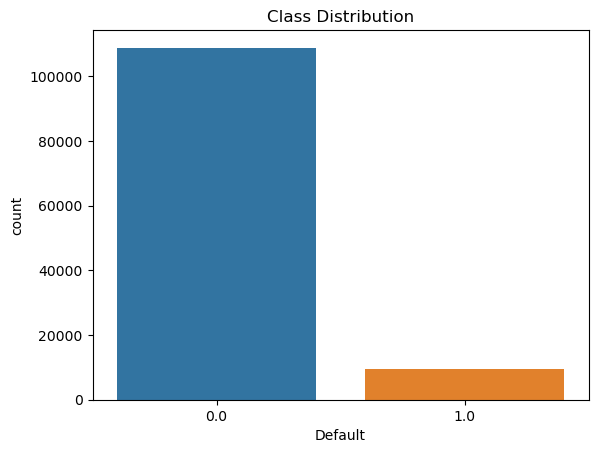

% of no defaults       : 91.90701133204323
% of defaults         : 8.092988667956767


In [73]:
targetplot= sns.countplot(x = 'Default', data = data)
plt.title('Class Distribution')
plt.show()
Count_Normal_transacation = len(data[data['Default']==0])
Count_Fraud_transacation = len(data[data['Default']==1])
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of no defaults       :', Percentage_of_Normal_transacation*100)
print('% of defaults         :',Percentage_of_Fraud_transacation*100)


In [74]:
# Highly skewed distribution with 8% defaults and 92% no defaults

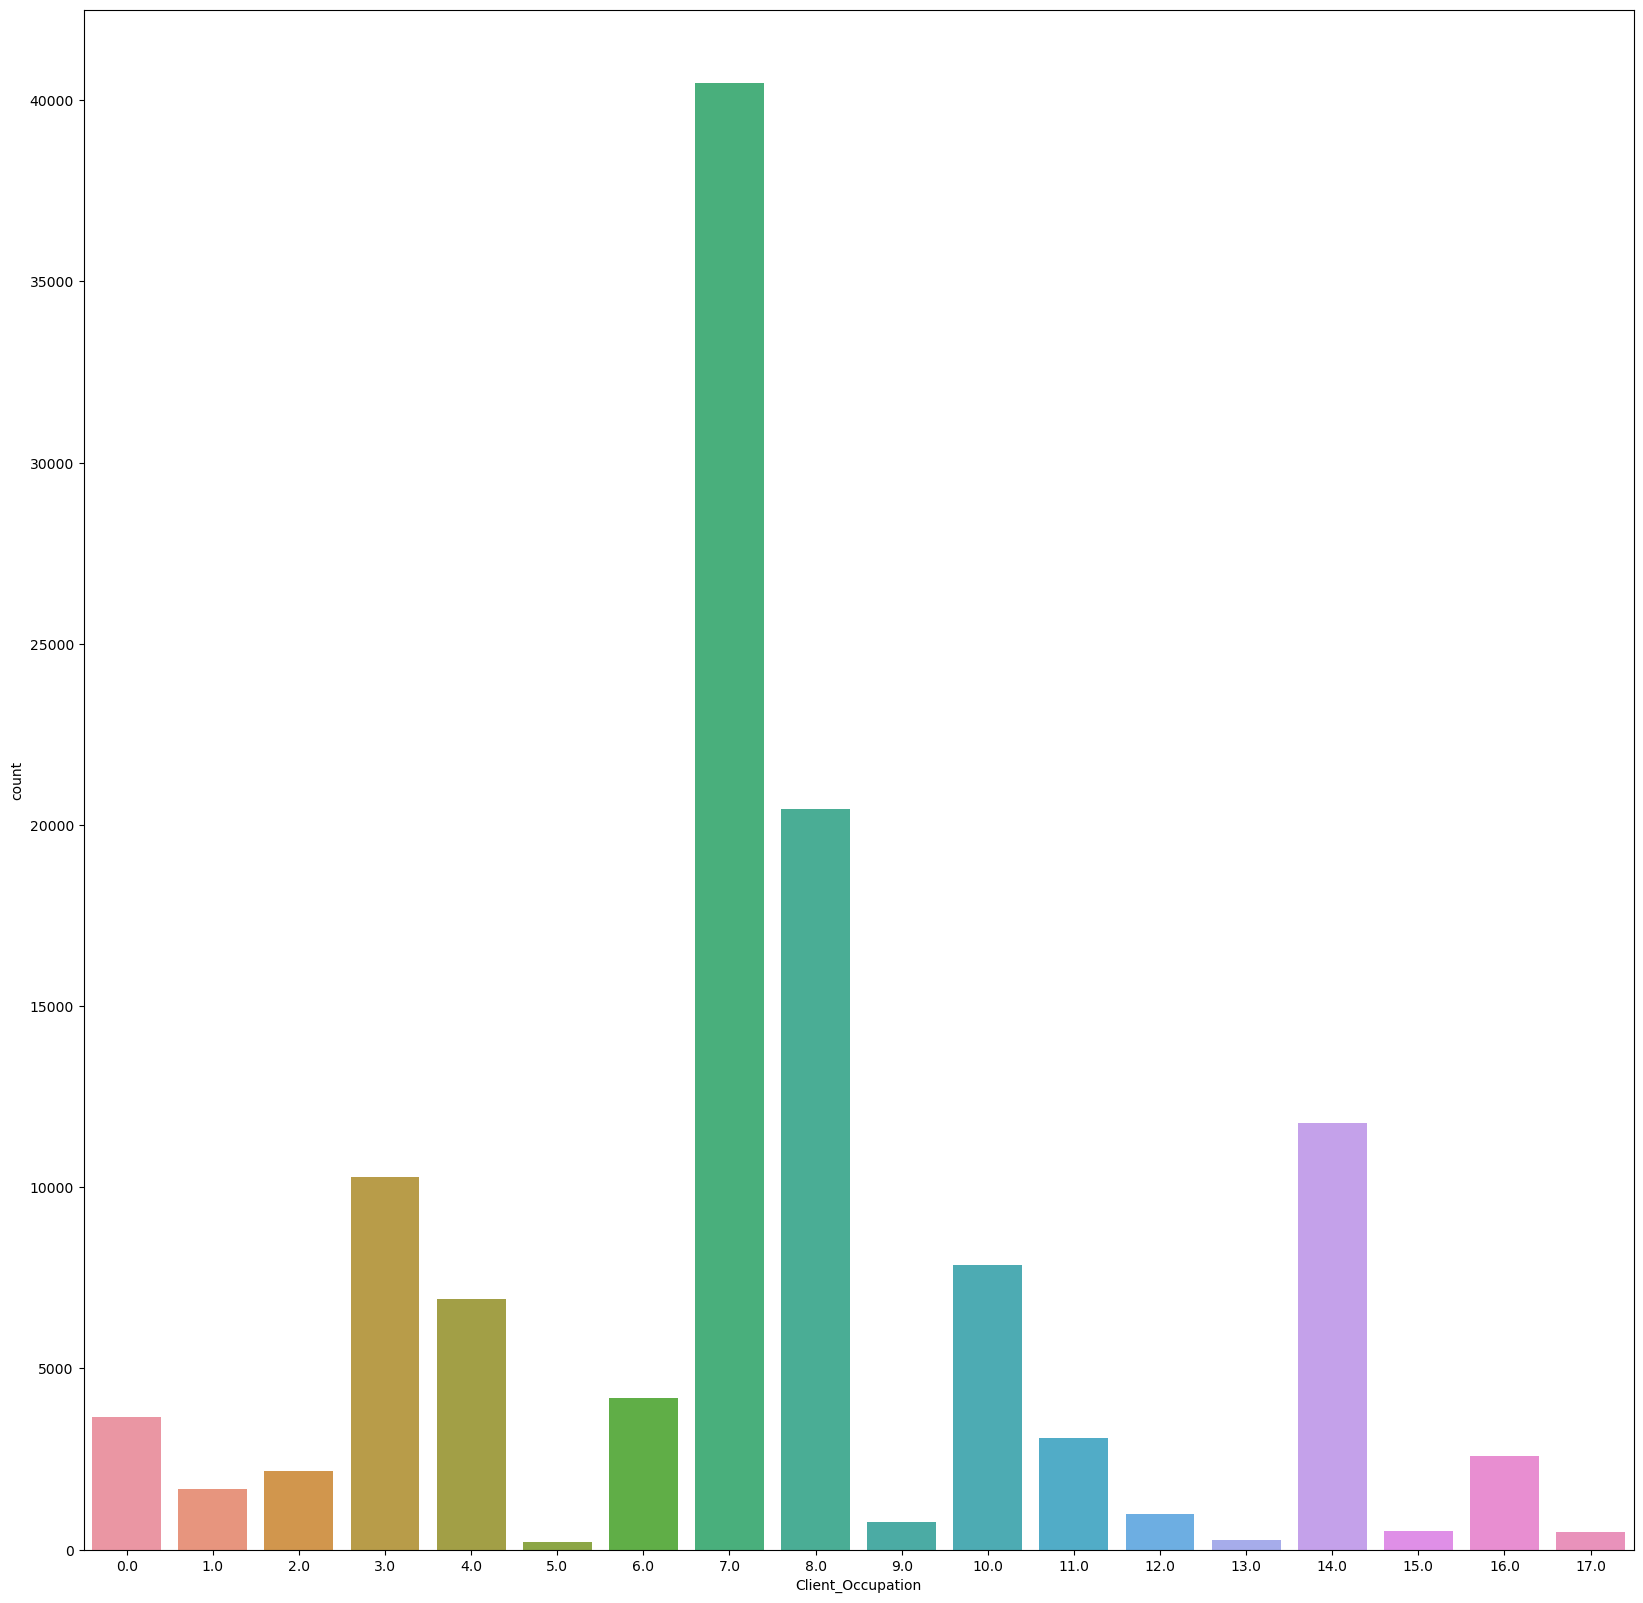

In [75]:
plt.figure(figsize=[20,20])
sns.countplot("Client_Occupation",data=data)
plt.show()


In [76]:
# laborers has more count than others.

<AxesSubplot:ylabel='Default'>

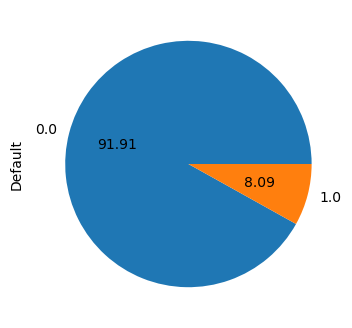

In [77]:
data['Default'].value_counts().plot.pie(autopct='%.2f',figsize=(4,4))

<AxesSubplot:xlabel='Accompany_Client', ylabel='Child_Count'>

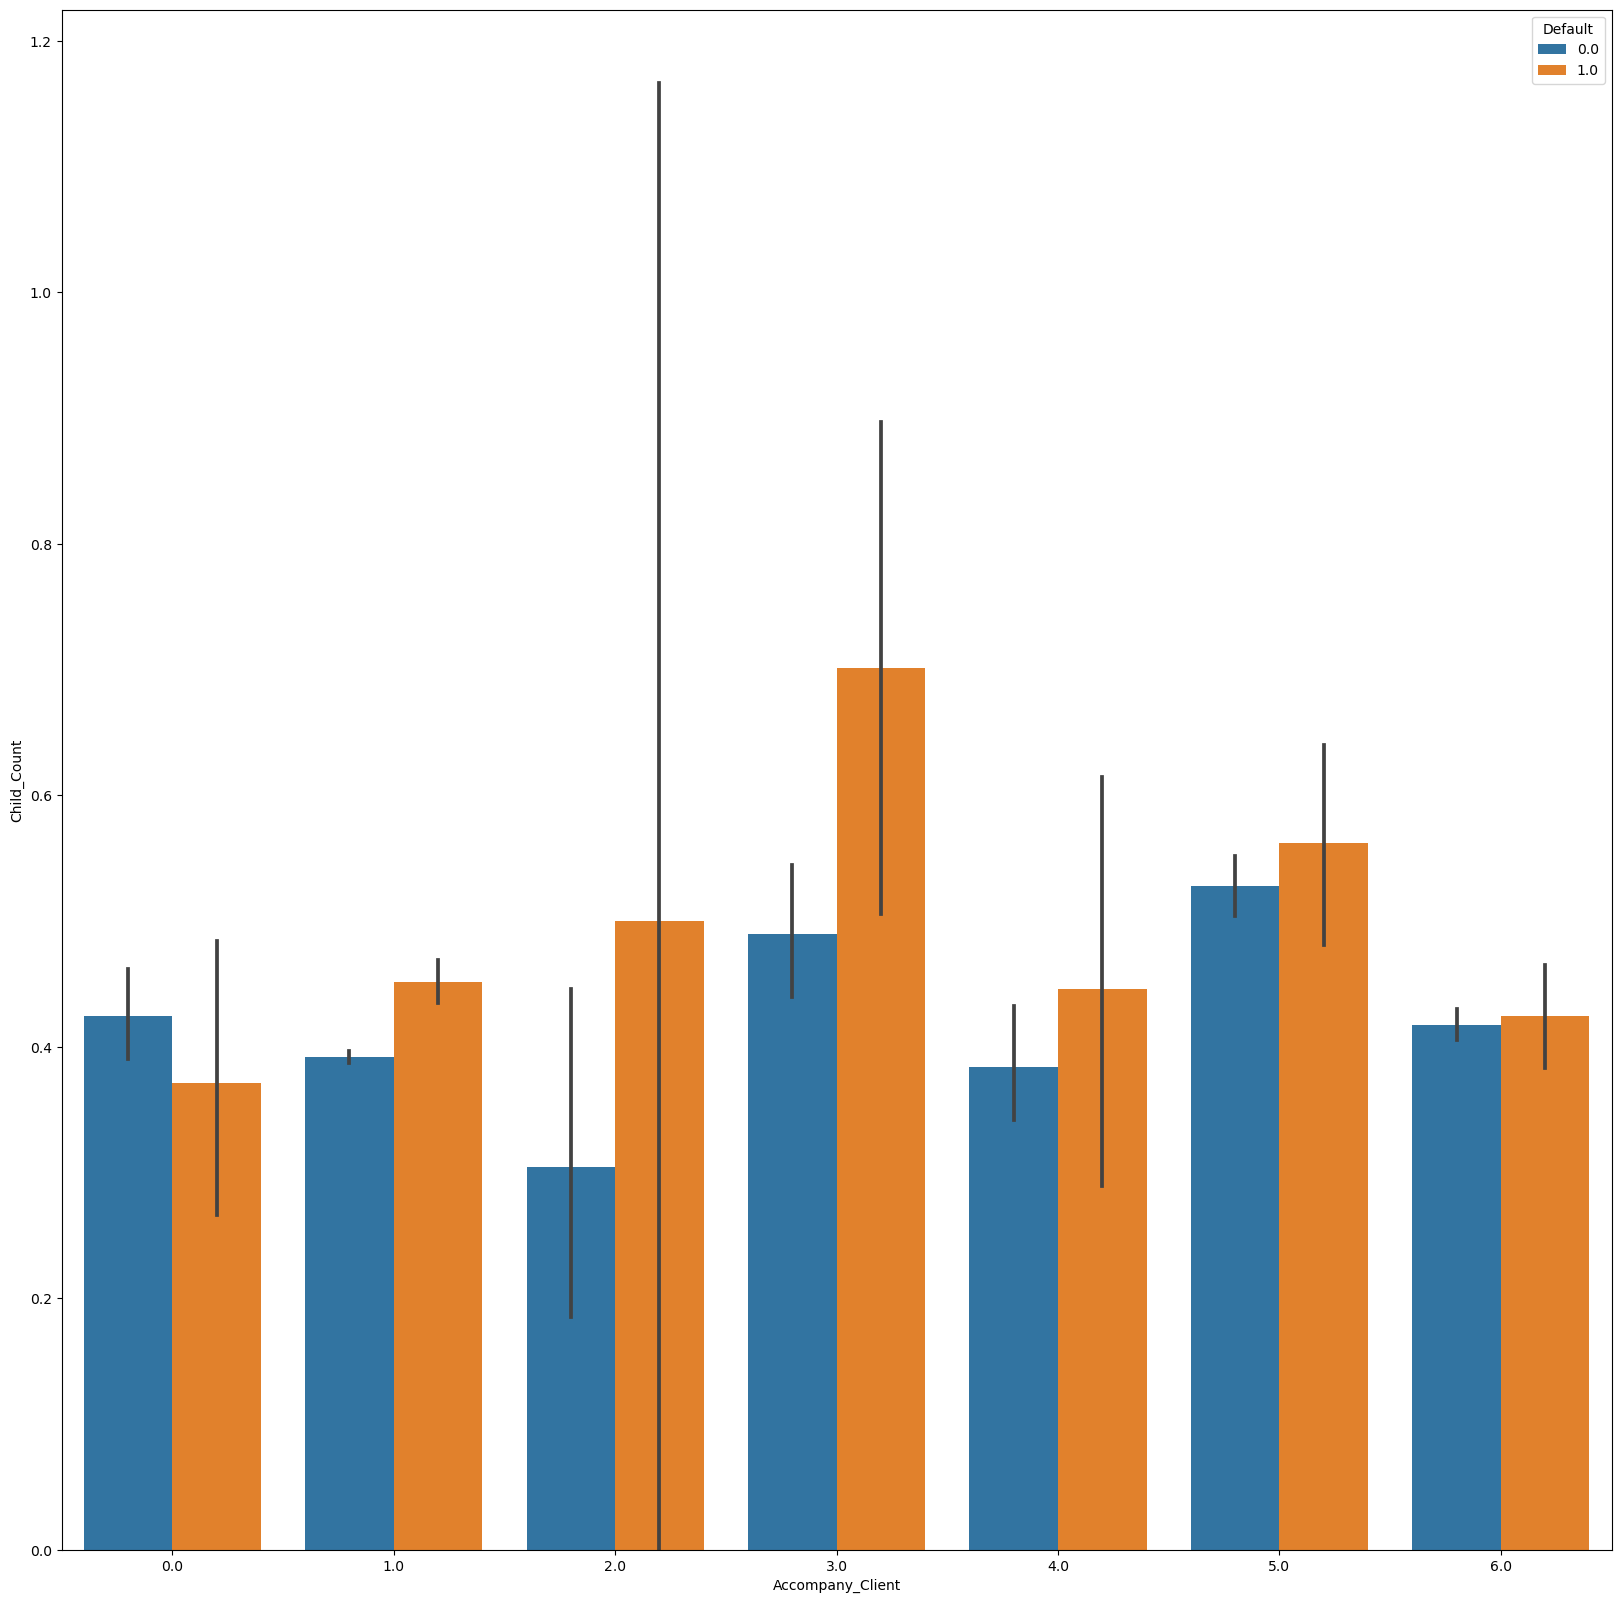

In [78]:
plt.figure(figsize=[20,20])
sns.barplot(x="Accompany_Client",y="Child_Count",hue="Default",data=data)

Text(0.5, 1.0, 'scatter plot')

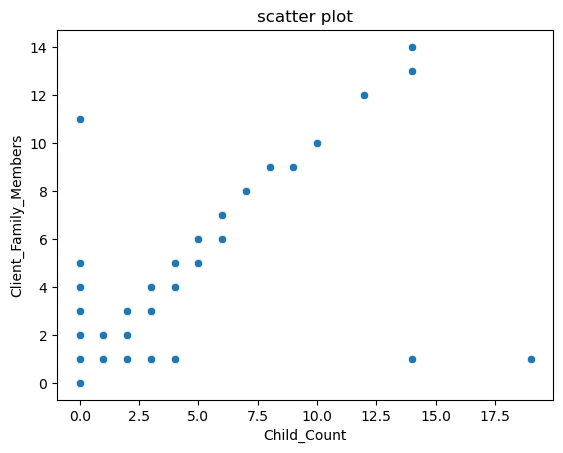

In [79]:
sns.scatterplot(x="Child_Count",y="Client_Family_Members",data=data)
plt.title("scatter plot")

In [80]:
# in the scatterplot there is some relation between Child_count members and client family members.

In [81]:
d1=data.corr()
d1

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
Client_Income,1.000000,0.162176,-0.003213,0.000926,0.004131,0.024468,-0.022748,0.387936,-0.023460,-0.137332,...,-0.002195,0.076093,-0.006817,-0.015239,-0.112032,0.136409,-0.055992,0.039789,0.032737,-0.021498
Car_Owned,0.162176,1.000000,-0.000156,-0.000447,-0.007452,0.094474,-0.013188,0.131857,0.014372,-0.025200,...,-0.003484,0.012999,-0.001691,-0.084989,-0.112028,0.048935,-0.008287,0.033793,-0.024185,-0.022884
Bike_Owned,-0.003213,-0.000156,1.000000,0.000994,0.001864,0.003139,-0.000100,-0.000479,0.003233,-0.003767,...,-0.003426,0.003069,-0.000230,-0.004940,-0.006474,-0.003758,-0.003870,-0.005155,-0.001598,0.001627
Active_Loan,0.000926,-0.000447,0.000994,1.000000,-0.007356,0.002390,0.001818,-0.001129,-0.002898,-0.001718,...,0.001559,0.004486,0.004839,0.003795,-0.001095,0.000218,0.003016,0.007925,0.008120,0.000508
House_Own,0.004131,-0.007452,0.001864,-0.007356,1.000000,-0.003016,-0.007582,-0.002249,0.050528,0.003607,...,0.011111,-0.098749,0.054399,0.033362,0.047052,0.001399,0.028980,-0.022474,0.053927,-0.001673
Child_Count,0.024468,0.094474,0.003139,0.002390,-0.003016,1.000000,0.023026,0.019964,0.021180,0.001957,...,-0.000179,-0.009414,-0.017194,-0.065926,-0.134788,-0.018228,-0.036615,0.009236,-0.029665,0.019533
Credit_Amount,-0.022748,-0.013188,-0.000100,0.001818,-0.007582,0.023026,1.000000,-0.011245,0.008674,0.025297,...,0.003483,-0.026125,0.068271,0.062594,0.155310,0.048595,0.111573,0.088094,0.044250,-0.052671
Loan_Annuity,0.387936,0.131857,-0.000479,-0.001129,-0.002249,0.019964,-0.011245,1.000000,0.024605,-0.110025,...,0.000087,0.053949,0.007999,-0.007633,-0.071961,0.124783,0.022980,0.058394,-0.009104,-0.012417
Accompany_Client,-0.023460,0.014372,0.003233,-0.002898,0.050528,0.021180,0.008674,0.024605,1.000000,0.004987,...,0.004052,0.021907,0.017257,-0.008445,0.012193,-0.005046,0.042832,-0.019276,-0.015319,-0.008689
Client_Income_Type,-0.137332,-0.025200,-0.003767,-0.001718,0.003607,0.001957,0.025297,-0.110025,0.004987,1.000000,...,0.001386,-0.055283,0.020713,-0.012645,0.056831,-0.089943,0.003721,-0.011645,0.010088,0.028421


In [82]:
# heatmap

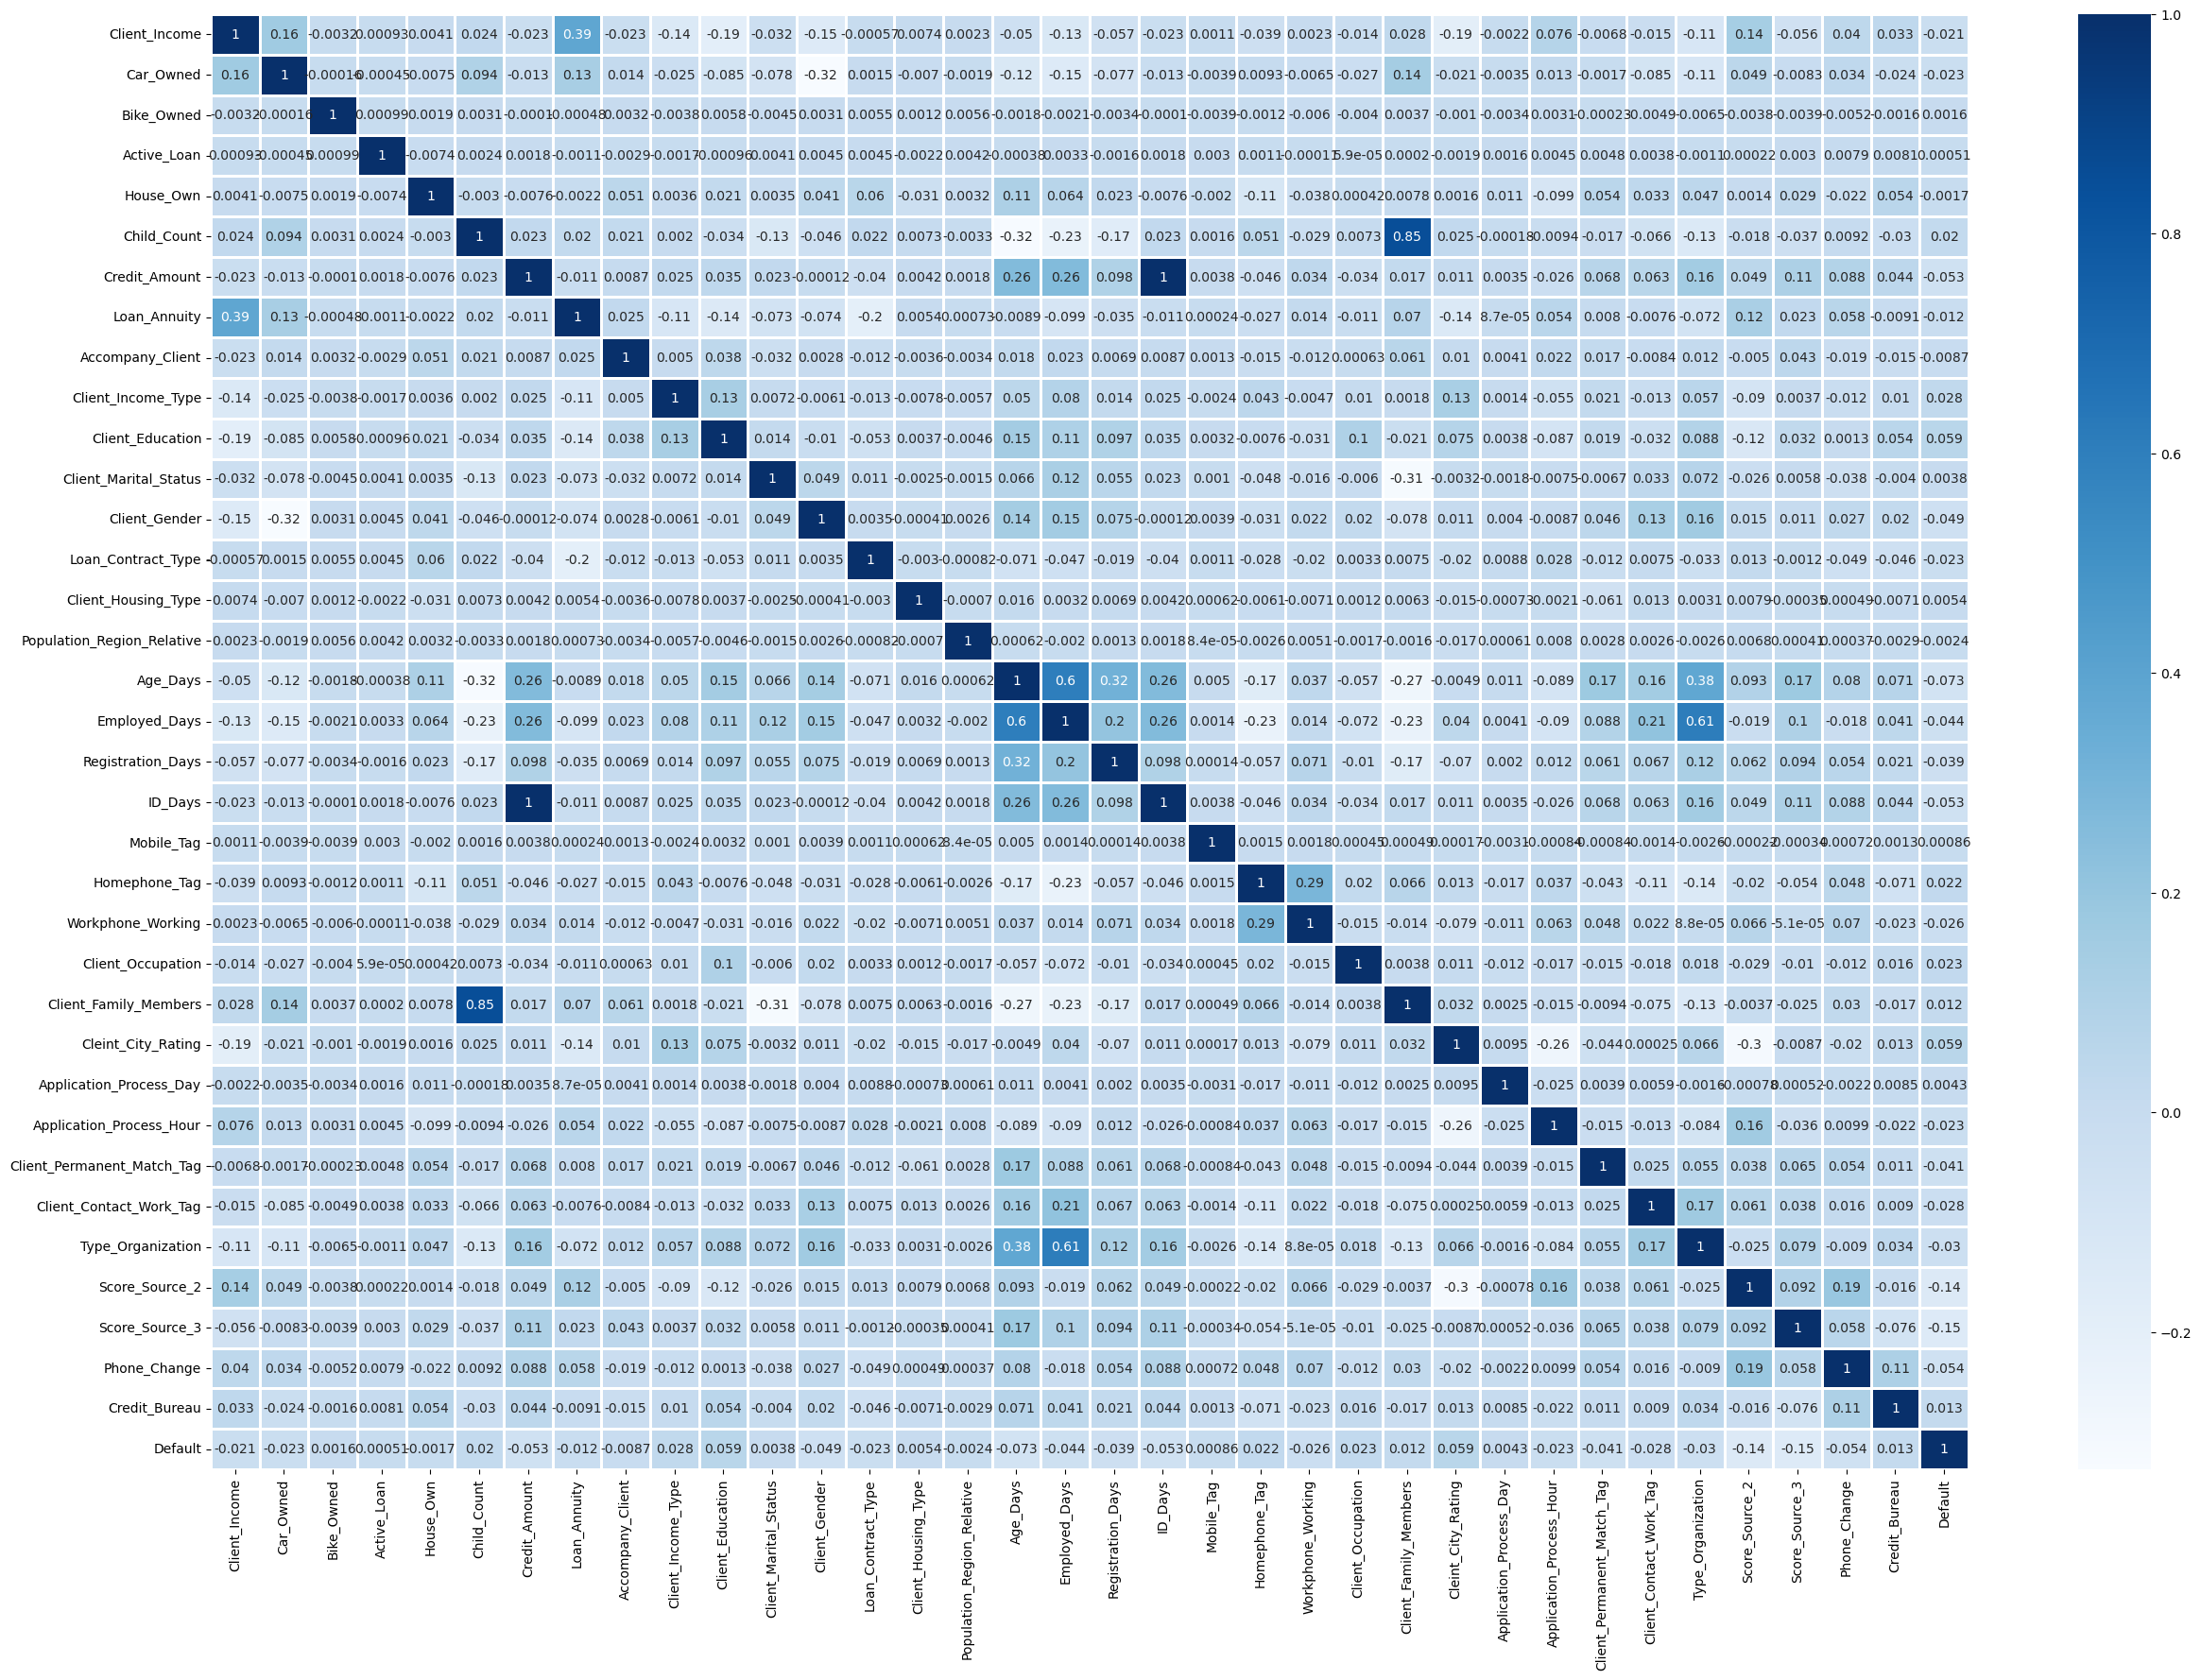

In [83]:
plt.figure(figsize=[30,20])
heatmap=sns.heatmap(d1,linewidth=1,annot=True,cmap=plt.cm.Blues)

In [84]:
data.shape

(118337, 36)

In [85]:
x=data.drop("Default",axis=1)
y=data["Default"]

In [86]:
h_x_train,h_x_test,h_y_train,h_y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [87]:
h_x_train.shape,h_x_test.shape,h_y_train.shape,h_y_test.shape

((94669, 35), (23668, 35), (94669,), (23668,))

In [88]:
data.dtypes

Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client              float64
Client_Income_Type            float64
Client_Education              float64
Client_Marital_Status         float64
Client_Gender                 float64
Loan_Contract_Type            float64
Client_Housing_Type           float64
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Mobile_Tag                    float64
Homephone_Tag                 float64
Workphone_Working             float64
Client_Occupation             float64
Client_Family_Members         float64
Cleint_City_Rating            float64
Application_

# Logistic Regression

In [89]:
lg.fit(h_x_train,h_y_train)

LogisticRegression()

In [90]:
p1=lg.predict(h_x_test)

In [91]:
m1=confusion_matrix(p1,h_y_test)
m1

array([[21740,  1928],
       [    0,     0]], dtype=int64)

In [92]:
TN,FP,FN,TP=m1.ravel()

In [93]:
#lp=TP/(TP+FP)
lp=0

In [94]:
#lr=TP/(TP+FN)
lr=0

In [95]:
#lf1=2*(lp*lr)/(lp+lr)
lf1=0

In [96]:
ac1=m1.diagonal().sum()/m1.sum()*100
ac1

91.85398005746154

In [97]:

print(classification_report(p1,h_y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     23668
         1.0       0.00      0.00      0.00         0

    accuracy                           0.92     23668
   macro avg       0.50      0.46      0.48     23668
weighted avg       1.00      0.92      0.96     23668



# Decision Tree

In [98]:
dt.fit(h_x_train,h_y_train)

DecisionTreeClassifier()

In [99]:
d_p=dt.predict(h_x_test)

In [100]:
dm=confusion_matrix(d_p,h_y_test)
dm

array([[20027,  1423],
       [ 1713,   505]], dtype=int64)

In [101]:
TN,FP,FN,TP=dm.ravel()

In [102]:
dp=TP/(TP+FP)
dp

0.2619294605809129

In [103]:
dr=TP/(TP+FN)
dr

0.22768259693417492

In [104]:
df1=2*(dp*dr)/(dp+dr)
df1

0.24360829715388327

In [105]:
d_acc=dm.diagonal().sum()/dm.sum()*100
d_acc

86.75004225114078

In [106]:
print(classification_report(d_p,h_y_test))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93     21450
         1.0       0.26      0.23      0.24      2218

    accuracy                           0.87     23668
   macro avg       0.59      0.58      0.59     23668
weighted avg       0.86      0.87      0.86     23668



# ramdom_forest¶

In [107]:
rf.fit(h_x_train,h_y_train)

RandomForestClassifier()

In [108]:
r_p=rf.predict(h_x_test)

In [109]:
rm=confusion_matrix(r_p,h_y_test)
rm

array([[21737,  1770],
       [    3,   158]], dtype=int64)

In [110]:
TN,FP,FN,TP=rm.ravel()

In [111]:
rp=TP/(TP+FP)
rp

0.08195020746887967

In [112]:
rr=TP/(TP+FN)
rr

0.9813664596273292

In [113]:
rf1=2*(rp*rr)/(rp+rr)
rf1

0.15126854954523694

In [114]:
rf_acc=rm.diagonal().sum()/rm.sum()*100
rf_acc

92.50887273956397

In [115]:
print(classification_report(r_p,h_y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     23507
         1.0       0.08      0.98      0.15       161

    accuracy                           0.93     23668
   macro avg       0.54      0.95      0.56     23668
weighted avg       0.99      0.93      0.96     23668



# AUC & ROC

In [116]:
y_pred_prob=rf.predict_proba(h_x_test)[:, 1]

In [117]:
roc=roc_auc_score(r_p,h_y_test)

In [118]:
fpr,tpr,threshold=roc_curve(h_y_test,y_pred_prob,pos_label=1)

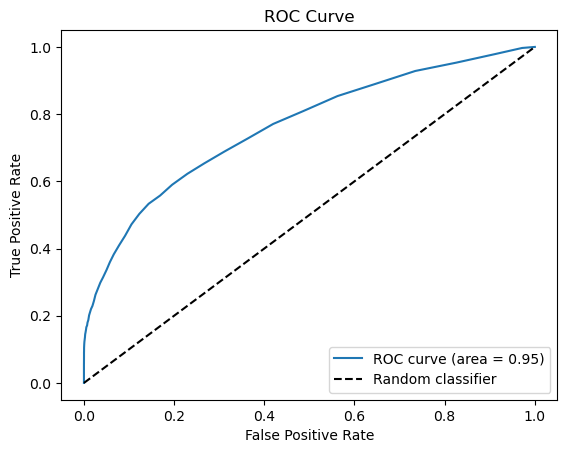

In [119]:
 #Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc) 
# roc curve for tpr = fpr  
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

# PRC

In [120]:
precision,recall,threshold=precision_recall_curve(h_y_test,y_pred_prob)

Text(0.5, 1.0, 'precision-recall')

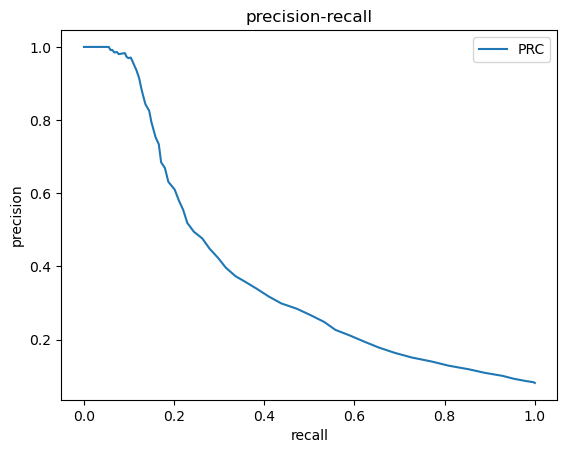

In [121]:
plt.plot(recall,precision,label="PRC")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="upper right")
plt.title("precision-recall")

# k-nn

In [122]:
knn.fit(h_x_train,h_y_train)

KNeighborsClassifier(n_neighbors=40)

In [123]:
k_p=knn.predict(h_x_test)

In [124]:
km=confusion_matrix(k_p,h_y_test)
km

array([[21740,  1928],
       [    0,     0]], dtype=int64)

In [125]:
TN,FP,FN,TP=km.ravel()

In [126]:
#kp=TP/(TP+FP)
kp=0

In [127]:
#kr=TP/(TP+FN)
kr=0

In [128]:
#kf1=2*(kp*kr)/(kp+kr)
kf1=0

In [129]:
k_acc=km.diagonal().sum()/km.sum()*100
k_acc

91.85398005746154

In [130]:
print(classification_report(k_p,h_y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     23668
         1.0       0.00      0.00      0.00         0

    accuracy                           0.92     23668
   macro avg       0.50      0.46      0.48     23668
weighted avg       1.00      0.92      0.96     23668



# svm

In [131]:
svc.fit(h_x_train,h_y_train)

SVC()

In [132]:
s_p=svc.predict(h_x_test)

In [133]:
sm=confusion_matrix(s_p,h_y_test)
sm

array([[21740,  1928],
       [    0,     0]], dtype=int64)

In [134]:
TN,FP,FN,TP=sm.ravel()

In [135]:
#sp=TP/(TP+FP)
sp=0

In [136]:
#sr=TP/(TP+FN)
sr=0

In [137]:
#sf1=2*(sp*sr)/(sp+sr)
sf1=0

In [138]:
s_acc=sm.diagonal().sum()/sm.sum()*100
s_acc

91.85398005746154

In [139]:
print(classification_report(s_p,h_y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     23668
         1.0       0.00      0.00      0.00         0

    accuracy                           0.92     23668
   macro avg       0.50      0.46      0.48     23668
weighted avg       1.00      0.92      0.96     23668



# NaiveBayes

In [140]:
nb.fit(h_x_train,h_y_train)
n_p=nb.predict(h_x_test)
nm=confusion_matrix(n_p,h_y_test)
TN,FP,FN,TP=nm.ravel()
np=TP/(TP+FP)
nr=TP/(TP+FN)
nf1=2*(np*nr)/(np+nr)
n_acc=nm.diagonal().sum()/nm.sum()*100
print(classification_report(n_p,h_y_test))

              precision    recall  f1-score   support

         0.0       0.18      0.95      0.30      4088
         1.0       0.89      0.09      0.16     19580

    accuracy                           0.24     23668
   macro avg       0.53      0.52      0.23     23668
weighted avg       0.76      0.24      0.18     23668



# Report

In [141]:
list1=["Logistic","DT","RF","KNN","SVM","NB"]
list2=[ac1,d_acc,rf_acc,k_acc,s_acc,n_acc]
list3=[lp,dp,rp,kp,sp,np]
list4=[lr,dr,rr,kr,sr,nr]
list5=[lf1,df1,rf1,kf1,sf1,nf1]

In [142]:
result=pd.DataFrame({"model_name":list1,"Accuracy":list2,"precision":list3,"recall":list4,"F1-score":list5})
result

,model_name,Accuracy,precision,recall,F1-score
0,Logistic,91.853980,0.000000,0.000000,0.000000
1,DT,86.750042,0.261929,0.227683,0.243608
2,RF,92.508873,0.081950,0.981366,0.151269
3,KNN,91.853980,0.000000,0.000000,0.000000
4,SVM,91.853980,0.000000,0.000000,0.000000
5,NB,23.584587,0.887448,0.087385,0.159104


In [143]:
# out of above 6 model random forest is good for because accracy is 92.491972 , precision 0.08, recall=0.97 and f1-score=0.14

# Class Imbalance

In [144]:
data.Default.value_counts()

0.0    108760
1.0      9577
Name: Default, dtype: int64

In [145]:
x=data.iloc[:,0:35]
y=data.iloc[:,-1]

In [146]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [147]:
x_smote,y_smote=smote.fit_resample(x,y)

In [148]:
x_smote.shape,y_smote.shape

((217520, 35), (217520,))

In [149]:
y_smote.value_counts()

0.0    108760
1.0    108760
Name: Default, dtype: int64

In [150]:
rx_train,rx_test,ry_train,ry_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=101)

In [151]:
rx_train.shape,rx_test.shape,ry_train.shape,ry_test.shape

((174016, 35), (43504, 35), (174016,), (43504,))

# outlier Treatment

In [152]:
#plt.figure(figsize=[20,50])
#sns.boxplot(data=x_smote, orient="h", palette="Set2")

<AxesSubplot:ylabel='Child_Count'>

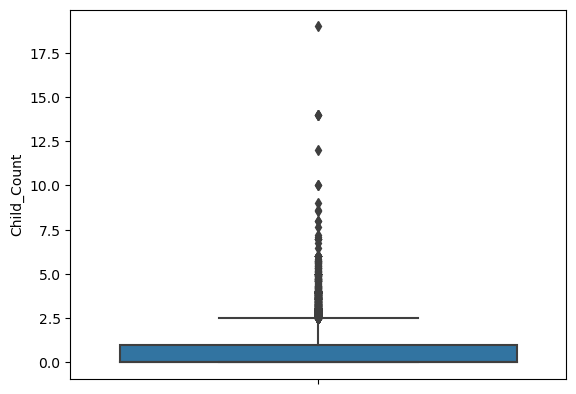

In [153]:
sns.boxplot(data=x_smote,y="Child_Count")

(array([2.01564e+05, 1.56350e+04, 2.83000e+02, 2.50000e+01, 6.00000e+00,
        2.00000e+00, 1.00000e+00, 3.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

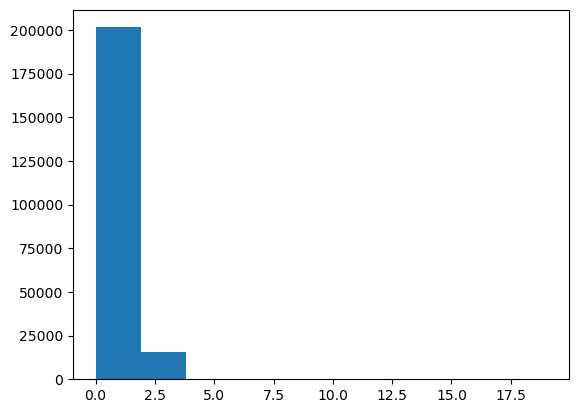

In [154]:
plt.hist(x_smote["Child_Count"])

In [155]:
x_smote.Child_Count.value_counts()

0.000000    132599
1.000000     28887
2.000000     11647
3.000000      1448
4.000000       166
             ...  
0.194253         1
1.399791         1
1.749087         1
0.266185         1
0.646410         1
Name: Child_Count, Length: 42727, dtype: int64

<AxesSubplot:xlabel='Child_Count', ylabel='Density'>

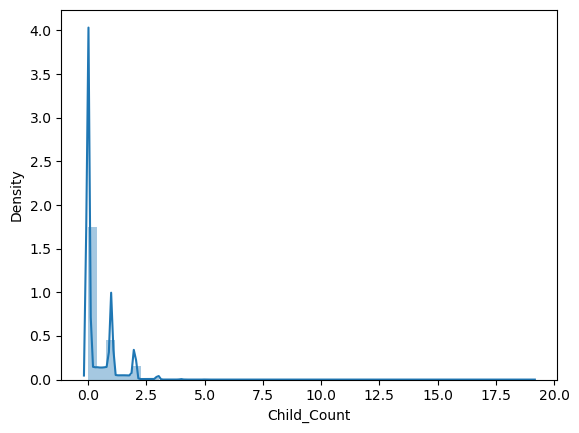

In [156]:
sns.distplot(x_smote["Child_Count"])

In [157]:
IQR=x_smote.Child_Count.quantile(0.75)-x_smote.Child_Count.quantile(0.25)
up1=x_smote.Child_Count.quantile(0.75)+(3*IQR)
up1

3.9891742284562155

In [158]:
x_smote.loc[x_smote["Child_Count"]>4.0,"Child_Count"]=4.0

<AxesSubplot:xlabel='Child_Count', ylabel='Density'>

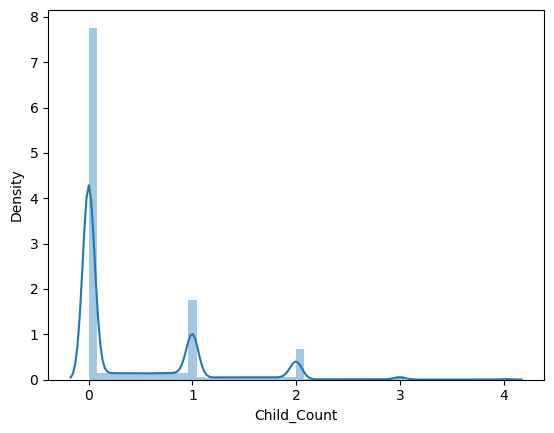

In [159]:
sns.distplot(x_smote["Child_Count"])

<AxesSubplot:ylabel='Client_Income'>

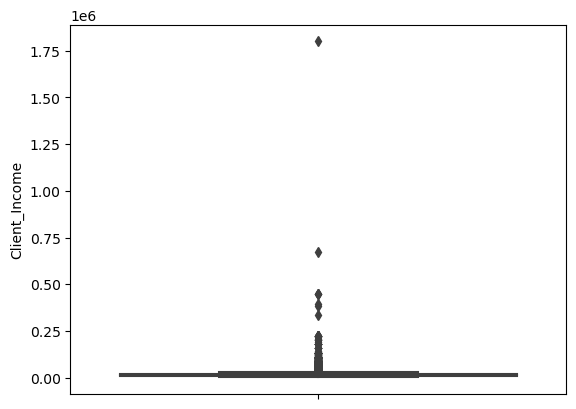

In [160]:
sns.boxplot(data=x_smote,y="Client_Income")

<AxesSubplot:xlabel='Client_Income', ylabel='Density'>

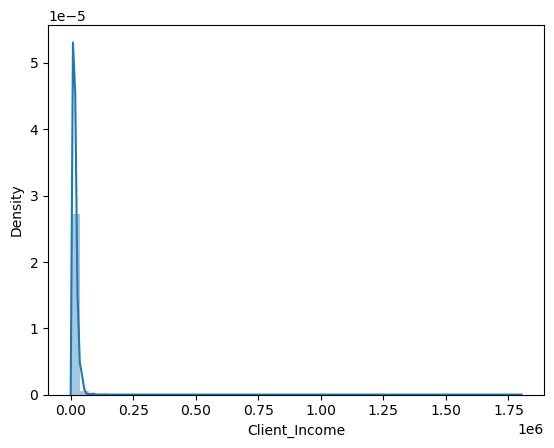

In [161]:
sns.distplot(x_smote["Client_Income"])

In [162]:
IQR1=x_smote.Client_Income.quantile(0.75)-x_smote.Client_Income.quantile(0.25)
up1=x_smote.Client_Income.quantile(0.75)+(3*IQR1)
up1

47250.0

In [163]:
x_smote.loc[x_smote["Client_Income"]>47250.0,"Client_Income"]=47250.0

<AxesSubplot:ylabel='Client_Income'>

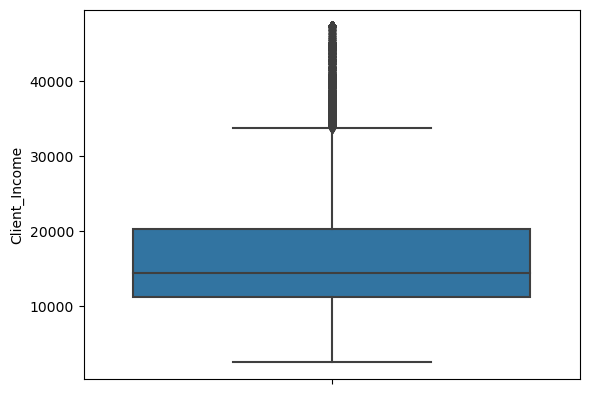

In [164]:
sns.boxplot(data=x_smote,y="Client_Income")

<AxesSubplot:ylabel='Loan_Annuity'>

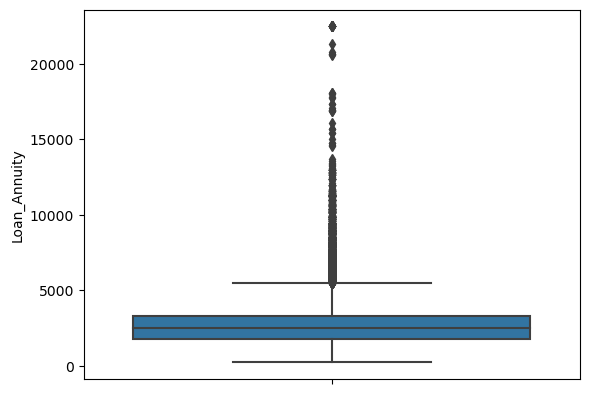

In [165]:
sns.boxplot(data=x_smote,y="Loan_Annuity")

<AxesSubplot:xlabel='Loan_Annuity', ylabel='Density'>

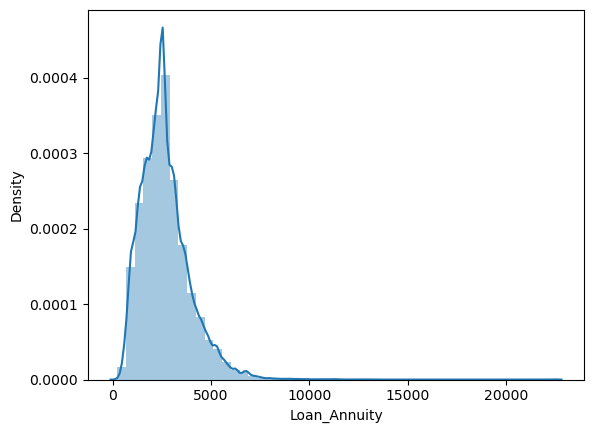

In [166]:
sns.distplot(x_smote["Loan_Annuity"])

In [167]:
IQR2=x_smote.Loan_Annuity.quantile(0.75)-x_smote.Loan_Annuity.quantile(0.25)
up1=x_smote.Loan_Annuity.quantile(0.75)+(3*IQR2)
up1

7729.265389248429

In [168]:
x_smote.loc[x_smote["Loan_Annuity"]>7750.322448041045,"Loan_Annuity"]=7750.322448041045

<AxesSubplot:xlabel='Loan_Annuity', ylabel='Density'>

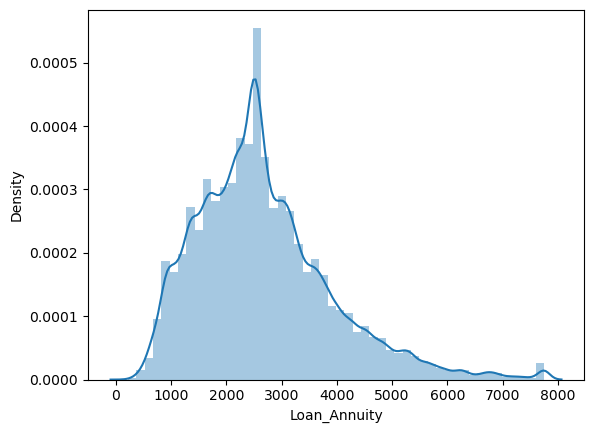

In [169]:
sns.distplot(x_smote["Loan_Annuity"])

<AxesSubplot:ylabel='Application_Process_Hour'>

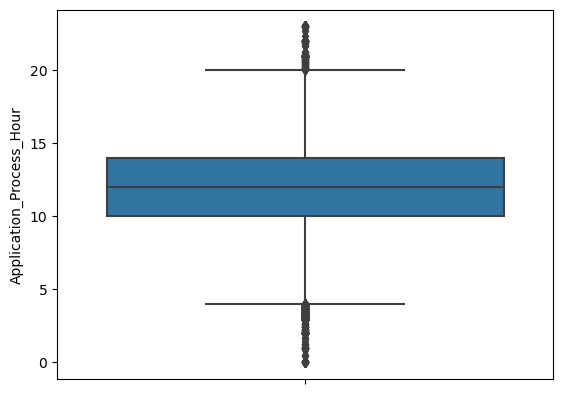

In [170]:
sns.boxplot(data=x_smote,y="Application_Process_Hour")

<AxesSubplot:xlabel='Application_Process_Hour', ylabel='Density'>

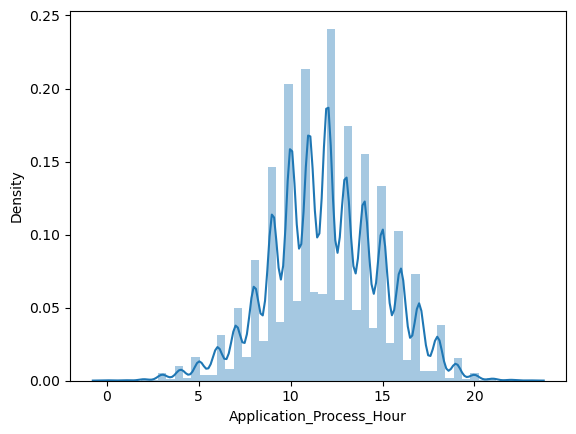

In [171]:
sns.distplot(x_smote["Application_Process_Hour"])

(array([  191.,  1778.,  6403., 32167., 57238., 57840., 45362., 13901.,
         2366.,   274.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

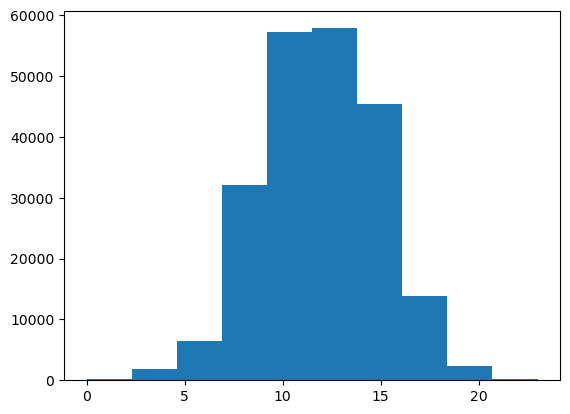

In [172]:
plt.hist(x_smote["Application_Process_Hour"])

In [173]:
IQR3=x_smote.Application_Process_Hour.quantile(0.75)-x_smote.Application_Process_Hour.quantile(0.25)
up1=x_smote.Application_Process_Hour.quantile(0.75)+(3*IQR3)
up1

26.0

In [174]:
x_smote.loc[x_smote["Application_Process_Hour"]>26.0,"Application_Process_Hour"]=26.0

(array([  191.,  1778.,  6403., 32167., 57238., 57840., 45362., 13901.,
         2366.,   274.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

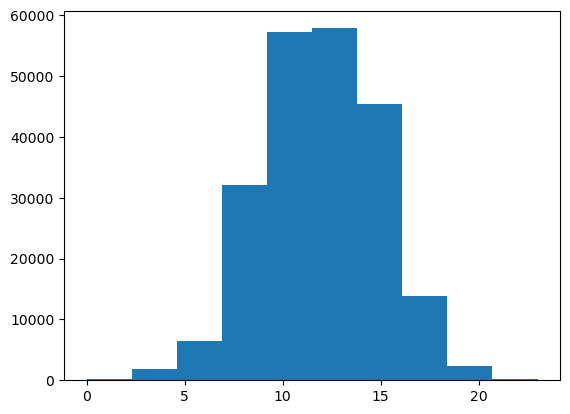

In [175]:
plt.hist(x_smote["Application_Process_Hour"])

<AxesSubplot:ylabel='Registration_Days'>

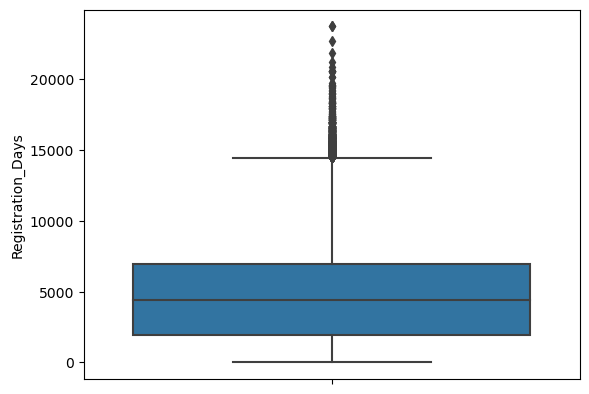

In [176]:
sns.boxplot(data=x_smote,y="Registration_Days")

<AxesSubplot:xlabel='Registration_Days', ylabel='Density'>

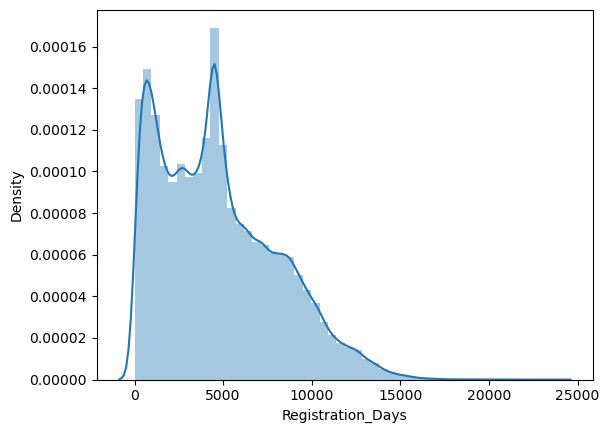

In [177]:
sns.distplot(x_smote["Registration_Days"])

(array([6.2899e+04, 6.0472e+04, 4.2042e+04, 3.0461e+04, 1.5142e+04,
        5.4460e+03, 9.4100e+02, 9.3000e+01, 2.0000e+01, 4.0000e+00]),
 array([    0. ,  2373.8,  4747.6,  7121.4,  9495.2, 11869. , 14242.8,
        16616.6, 18990.4, 21364.2, 23738. ]),
 <BarContainer object of 10 artists>)

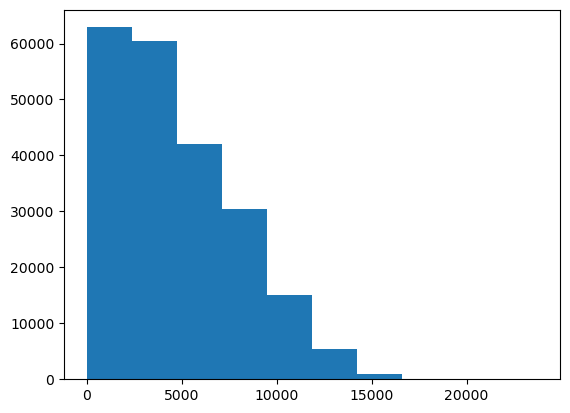

In [178]:
plt.hist(x_smote["Registration_Days"])

In [179]:
IQR4=x_smote.Registration_Days.quantile(0.75)-x_smote.Registration_Days.quantile(0.25)
up1=x_smote.Registration_Days.quantile(0.75)+(3*IQR4)
up1

21978.0

In [180]:
x_smote.loc[x_smote["Registration_Days"]>21963.0,"Registration_Days"]=21963.0

<AxesSubplot:xlabel='Registration_Days', ylabel='Density'>

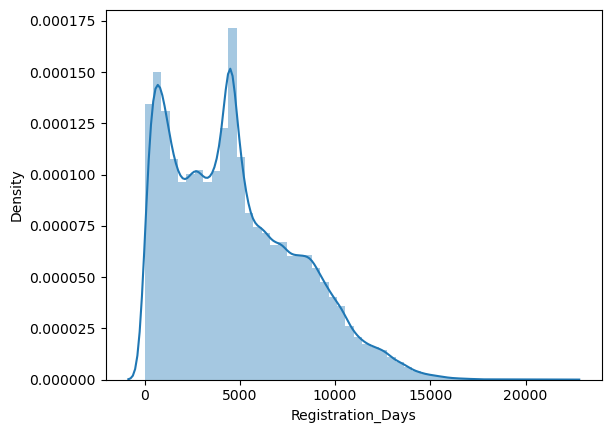

In [181]:
sns.distplot(x_smote["Registration_Days"])

<AxesSubplot:ylabel='Phone_Change'>

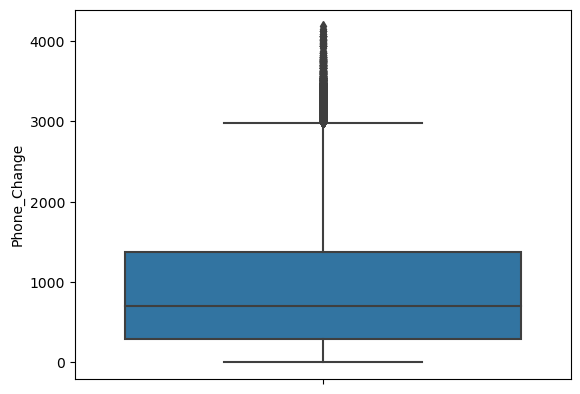

In [182]:
sns.boxplot(data=x_smote,y="Phone_Change")

<AxesSubplot:xlabel='Phone_Change', ylabel='Density'>

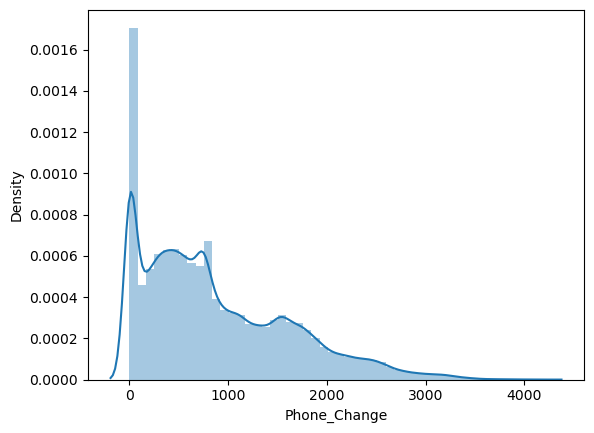

In [183]:
sns.distplot(x_smote["Phone_Change"])

In [184]:
IQR6=x_smote.Phone_Change.quantile(0.75)-x_smote.Phone_Change.quantile(0.25)
up1=x_smote.Phone_Change.quantile(0.75)+(3*IQR6)
up1

4605.474786715704

In [185]:
x_smote.loc[x_smote["Phone_Change"]>4614.0,"Phone_Change"]=4614.0

<AxesSubplot:xlabel='Phone_Change', ylabel='Density'>

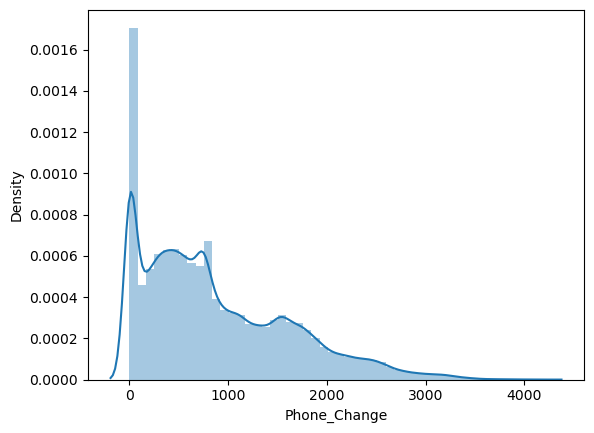

In [186]:
sns.distplot(x_smote["Phone_Change"])

<AxesSubplot:ylabel='Phone_Change'>

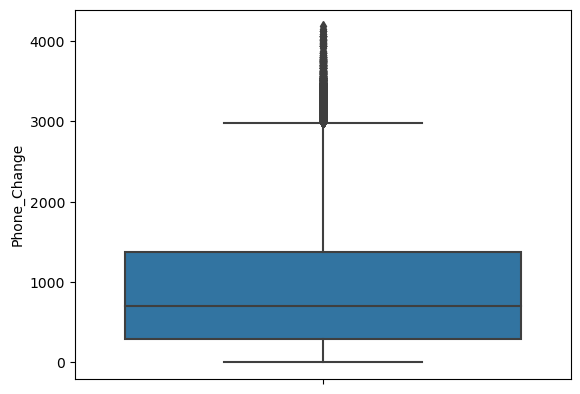

In [187]:
sns.boxplot(data=x_smote,y="Phone_Change")

<AxesSubplot:xlabel='Credit_Bureau', ylabel='Density'>

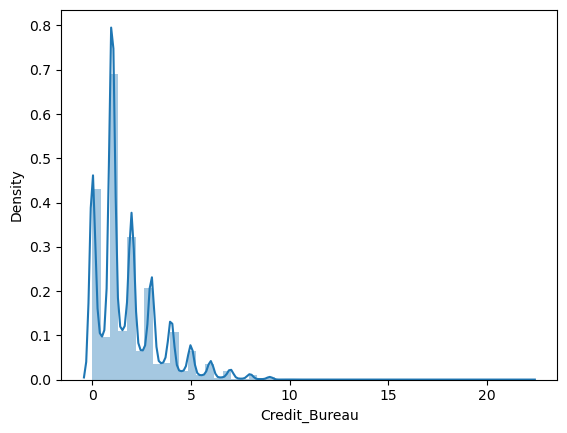

In [188]:
sns.distplot(x_smote["Credit_Bureau"])

In [189]:
IQR7=x_smote.Credit_Bureau.quantile(0.75)-x_smote.Credit_Bureau.quantile(0.25)
up1=x_smote.Credit_Bureau.quantile(0.75)+(3*IQR7)
up1

7.394748736071753

In [190]:
x_smote.loc[x_smote["Credit_Bureau"]>7.41,"Credit_Bureau"]=7.41

<AxesSubplot:xlabel='Credit_Bureau', ylabel='Density'>

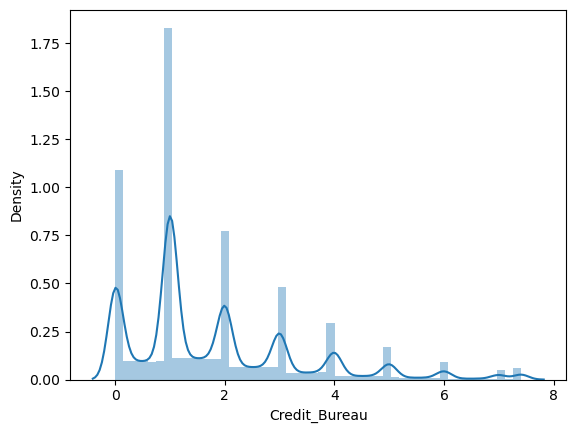

In [191]:
sns.distplot(x_smote["Credit_Bureau"])

# skewness Treatment

In [192]:
x_smote.skew()

Client_Income                   1.471846
Car_Owned                       0.644352
Bike_Owned                      0.601225
Active_Loan                    -0.052767
House_Own                      -0.718880
Child_Count                     1.683288
Credit_Amount                  -0.290060
Loan_Annuity                    1.007722
Accompany_Client                1.741084
Client_Income_Type             -0.791729
Client_Education               -1.252109
Client_Marital_Status           1.117905
Client_Gender                  -0.431689
Loan_Contract_Type              2.493473
Client_Housing_Type             3.103777
Population_Region_Relative    328.999355
Age_Days                        0.232573
Employed_Days                   1.990892
Registration_Days               0.654402
ID_Days                        -0.290060
Mobile_Tag                   -466.390394
Homephone_Tag                   1.379476
Workphone_Working               1.068497
Client_Occupation               0.346187
Client_Family_Me


# Logistic Regression

In [193]:
lg.fit(rx_train,ry_train)

LogisticRegression()

In [194]:
rp=lg.predict(rx_test)

In [195]:
rp_m=confusion_matrix(rp,ry_test)
rp_m

array([[14110,  9725],
       [ 7683, 11986]], dtype=int64)

In [196]:
TN1,FP1,FN1,TP1=rp_m.ravel()

In [197]:
lp1=TP1/(TP1+FP1)
lp1

0.5520703790705173

In [198]:
lr1=TP1/(TP1+FN1)
lr1

0.6093853271645737

In [199]:
lf2=2*(lp1*lr1)/(lp1+lr1)

In [200]:
l_acc=rp_m.diagonal().sum()/rp_m.sum()*100
l_acc

59.985288709084216

In [201]:
print(classification_report(rp,ry_test))

              precision    recall  f1-score   support

         0.0       0.65      0.59      0.62     23835
         1.0       0.55      0.61      0.58     19669

    accuracy                           0.60     43504
   macro avg       0.60      0.60      0.60     43504
weighted avg       0.60      0.60      0.60     43504



# DecisionTree

In [202]:
dt.fit(rx_train,ry_train)

DecisionTreeClassifier()

In [203]:
dp=dt.predict(rx_test)

In [204]:
d_cm=confusion_matrix(dp,ry_test)

In [205]:
TN1,FP1,FN1,TP1=d_cm.ravel()

In [206]:
dp1=TP1/(TP1+FP1)

In [207]:
dr1=TP1/(TP1+FN1)

In [208]:
df2=2*(dp1*dr1)/(dp1+dr1)

In [209]:
d_acc2=d_cm.diagonal().sum()/d_cm.sum()*100

In [210]:
print(classification_report(dp,ry_test))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     21385
         1.0       0.93      0.91      0.92     22119

    accuracy                           0.92     43504
   macro avg       0.92      0.92      0.92     43504
weighted avg       0.92      0.92      0.92     43504



# Random forest Classifier

In [211]:
rf.fit(rx_train,ry_train)

RandomForestClassifier()

In [212]:
rfp=rf.predict(rx_test)

In [213]:
r_m=confusion_matrix(rfp,ry_test)
r_m

array([[21788,  1641],
       [    5, 20070]], dtype=int64)

In [214]:
TN1,FP1,FN1,TP1=r_m.ravel()

In [215]:
rp1=TP1/(TP1+FP1)
rp1

0.9244161945557552

In [216]:
rr1=TP1/(TP1+FN1)
rr1

0.9997509339975094

In [217]:
rf2=2*(rp1*rr1)/(rp1+rr1)
rf2

0.9606088163499736

In [218]:
rr_acc2=r_m.diagonal().sum()/r_m.sum()*100
rr_acc2

96.21643986759838

In [219]:
print(classification_report(rfp,ry_test))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     23429
         1.0       0.92      1.00      0.96     20075

    accuracy                           0.96     43504
   macro avg       0.96      0.96      0.96     43504
weighted avg       0.96      0.96      0.96     43504



# KNN

In [220]:
knn.fit(rx_train,ry_train)

KNeighborsClassifier(n_neighbors=40)

In [221]:
kp=knn.predict(rx_test)

In [222]:
k_c=confusion_matrix(kp,ry_test)
k_c

array([[12749,  2041],
       [ 9044, 19670]], dtype=int64)

In [223]:
TN1,FP1,FN1,TP1=k_c.ravel()

In [224]:
kp1=TP1/(TP1+FP1)
kp1

0.9059923541062135

In [225]:
kr1=TP1/(TP1+FN1)
kr1

0.6850316918576305

In [226]:
kf2=2*(kp1*kr1)/(kp1+kr1)

In [227]:
k_acc2=k_c.diagonal().sum()/k_c.sum()*100
k_acc2

74.51958440603163

In [228]:
print(classification_report(kp,ry_test))

              precision    recall  f1-score   support

         0.0       0.59      0.86      0.70     14790
         1.0       0.91      0.69      0.78     28714

    accuracy                           0.75     43504
   macro avg       0.75      0.77      0.74     43504
weighted avg       0.80      0.75      0.75     43504



# SVM

In [229]:
# svc.fit(rx_train,ry_train)
# sp=svc.predict(rx_test)
# svm2=confusion_matrix(sp,ry_test)
# TN1,FP1,FN1,TP1=svm2.ravel()
# sp1=TP1/(TP1+FP1)
# sr1=TP1/(TP1+FN1)
# sf2=2*(sp1*sr1)/(sp1+sr1)
# s_acc2=svm2.diagonal().sum()/svm2.sum()*100
# s_acc2
# print(classification_report(sp,ry_test))

# XGBOOST

In [230]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
xgb=XGBClassifier()

In [231]:
xgb.fit(rx_train,ry_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [232]:
xbg_p=xgb.predict(rx_test)

In [233]:
xgb_m=confusion_matrix(xbg_p,ry_test)
xgb_m

array([[21688,  1969],
       [  105, 19742]], dtype=int64)

In [234]:
TN1,FP1,FN1,TP1=xgb_m.ravel()

In [235]:
xp1=TP1/(TP1+FP1)

In [236]:
xr1=TP1/(TP1+FN1)
xr1

0.9947095278883459

In [237]:
xf2=2*(xp1*xr1)/(xp1+xr1)
xf2

0.9500938447471005

In [238]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

95.23262228760574

In [239]:
print(classification_report(xbg_p,ry_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.95     23657
           1       0.91      0.99      0.95     19847

    accuracy                           0.95     43504
   macro avg       0.95      0.96      0.95     43504
weighted avg       0.96      0.95      0.95     43504



In [240]:
# list1=["Logistic","DT","RF","KNN","SVM","xgb"]
# list2=[l_acc,d_acc2,rr_acc2,k_acc2,s_acc2,xgb_acc]
# list3=[lp1,dp1,rp1,kp1,sp1,xp1]
# list4=[lr1,dr1,rr1,kr1,sr1,xr1]
# list5=[lf2,df2,rf2,kf2,sf2,xf2]

In [241]:
list1=["Logistic","DT","RF","KNN","xgb"]
list2=[l_acc,d_acc2,rr_acc2,k_acc2,xgb_acc]
list3=[lp1,dp1,rp1,kp1,xp1]
list4=[lr1,dr1,rr1,kr1,xr1]
list5=[lf2,df2,rf2,kf2,xf2]

In [242]:
result=pd.DataFrame({"model_name":list1,"Accuracy":list2,"precision":list3,"recall":list4,"F1-score":list5})
result

,model_name,Accuracy,precision,recall,F1-score
0,Logistic,59.985289,0.552070,0.609385,0.579314
1,DT,91.908790,0.928331,0.911208,0.919690
2,RF,96.216440,0.924416,0.999751,0.960609
3,KNN,74.519584,0.905992,0.685032,0.780169
4,xgb,95.232622,0.909309,0.994710,0.950094


In [243]:
# out of above 6 model the Random forest is good because accuracy is high,precision is 0.92 and recalls 0.999 and its f1-score=0.9605.

In [244]:
from sklearn.feature_selection import RFE
rfe=RFE(dt)

In [245]:
rfe.fit(x_smote,y_smote)

RFE(estimator=DecisionTreeClassifier())

In [246]:
rfe.support_

array([False,  True,  True,  True,  True,  True, False,  True, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True,  True, False, False,  True, False, False,  True, False,
       False, False, False, False,  True,  True,  True, False])

In [247]:
df3=pd.DataFrame(rfe.support_)
df3

,0
0,False
1,True
2,True
3,True
4,True
5,True
6,False
7,True
8,False
9,False


In [248]:
pdf=pd.DataFrame({"feature_score":list(rfe.support_),"columns":list(x_smote.iloc[:0])})
pdf

,feature_score,columns
0,False,Client_Income
1,True,Car_Owned
2,True,Bike_Owned
3,True,Active_Loan
4,True,House_Own
5,True,Child_Count
6,False,Credit_Amount
7,True,Loan_Annuity
8,False,Accompany_Client
9,False,Client_Income_Type


In [249]:
data_newx=x_smote.drop(["Credit_Bureau","Type_Organizationss","Client_Contact_Work_Tag","Client_Permanent_Match_Tag","Application_Process_Hour",
                       "Application_Process_Day","Client_Occupation","Homephone_Tag","Mobile_Tag","Population_Region_Relative","Client_Housing_Type",
                       "Loan_Contract_Type","Client_Marital_Status","Client_Income_Type","Accompany_Client","Credit_Amount","Child_Count","Client_Income"],axis=1)
data_newx

,Car_Owned,Bike_Owned,Active_Loan,House_Own,Loan_Annuity,Client_Education,Client_Gender,Age_Days,Employed_Days,Registration_Days,ID_Days,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Score_Source_2,Score_Source_3,Phone_Change
0,0.000000,0.000000,1.000000,0.000000,3416.850000,4.00000,1.000000,13957.000000,1062.000000,6123.000000,383.000000,0.0,1.000000,1.000000,26889.000000,0.537070,63.000000
1,1.000000,0.000000,1.000000,0.000000,1826.550000,0.00000,1.000000,14162.000000,4129.000000,7833.000000,21.000000,1.0,1.000000,1.000000,8468.000000,0.537070,755.000000
2,0.000000,0.000000,1.000000,0.000000,2788.200000,1.00000,1.000000,16790.000000,5102.000000,4493.000000,331.000000,0.0,1.000000,1.000000,34947.000000,0.329655,277.000000
3,0.000000,0.000000,1.000000,1.000000,2295.450000,4.00000,1.000000,23195.000000,365243.000000,4493.000000,775.000000,0.0,1.000000,2.000000,4893.000000,0.631355,1700.000000
4,1.000000,0.000000,1.000000,0.000000,3547.350000,4.00000,0.000000,11366.000000,2977.000000,5516.000000,4043.000000,0.0,3.000000,0.000000,13185.000000,0.355639,674.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217515,0.000000,1.000000,0.000788,1.000000,2499.879503,4.00000,0.999212,18028.225739,365243.000000,3709.144591,1585.224951,0.0,0.000788,0.000000,18010.809920,0.537085,612.978712
217516,0.281286,1.000000,1.000000,0.281286,3018.582842,4.00000,0.000000,14607.332325,3916.261843,3345.563728,4199.019643,0.0,1.718714,0.281286,6356.702538,0.595862,520.098013
217517,1.000000,0.000000,1.000000,0.018651,1428.516813,4.00000,1.000000,13643.451523,2400.773637,268.093256,3244.741720,0.0,1.000000,1.018651,1003.416142,0.263787,1.186512
217518,0.257808,0.742192,0.000000,0.742192,2082.695951,4.00000,1.000000,16968.879934,2206.544854,770.340320,645.869828,0.0,1.000000,1.257808,39142.112663,0.322384,544.709877


In [250]:
#x_smote.head()

In [251]:
fx =data_newx.iloc[:,0:]
y_smote

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
217515    1.0
217516    1.0
217517    1.0
217518    1.0
217519    1.0
Name: Default, Length: 217520, dtype: float64

In [252]:
fx_train,fx_test,fy_train,fy_test=train_test_split(fx,y_smote,test_size=0.2,random_state=101)

In [253]:
fx_train.shape,fx_test.shape,fy_train.shape,fy_test.shape

((174016, 17), (43504, 17), (174016,), (43504,))

In [254]:
rf.fit(fx_train,fy_train)

RandomForestClassifier()

In [255]:
fpr1=rf.predict(fx_test)

In [256]:
frfe=confusion_matrix(fpr1,fy_test)
frfe

array([[21759,  1664],
       [   34, 20047]], dtype=int64)

In [257]:
print(classification_report(fpr1,fy_test))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     23423
         1.0       0.92      1.00      0.96     20081

    accuracy                           0.96     43504
   macro avg       0.96      0.96      0.96     43504
weighted avg       0.96      0.96      0.96     43504



In [258]:
TN1,FP1,FN1,TP1=frfe.ravel()

In [259]:
fsp1=TP1/(TP1+FP1)
fsp1

0.9233568237299065

In [260]:
fsr1=TP1/(TP1+FN1)
fsr1

0.9983068572282257

In [261]:
fsf2=2*(fsp1*fsr1)/(fsp1+fsr1)
fsf2

0.9593702143950995

In [262]:
rfe_acc=frfe.diagonal().sum()/frfe.sum()*100
rfe_acc

96.09691062890768

In [263]:
list1=["RF","XGB","RFE"]
list2=[rr_acc2,xgb_acc,rfe_acc]
list3=[rp1,xp1,fsp1]
list4=[rr1,xr1,fsr1]
list5=[rf2,xf2,fsf2]

In [264]:
result=pd.DataFrame({"model_name":list1,"Accuracy":list2,"precision":list3,"recall":list4,"F1-score":list5})
result

,model_name,Accuracy,precision,recall,F1-score
0,RF,96.216440,0.924416,0.999751,0.960609
1,XGB,95.232622,0.909309,0.994710,0.950094
2,RFE,96.096911,0.923357,0.998307,0.959370


# Cross Validation

In [269]:
from sklearn.model_selection import cross_val_score

In [270]:
scores=cross_val_score(rf,x,y,cv=5)

In [271]:
print(f"cross-validataion scores:{scores}")
print(f"mean cv accuracy: {scores.mean():.2f}")

cross-validataion scores:[0.92572249 0.92521548 0.9256771  0.9255926  0.92491655]
mean cv accuracy: 0.93


# Stratified K Fold

In [272]:
from sklearn.model_selection import StratifiedKFold

In [273]:
skf=StratifiedKFold(n_splits=5)

In [274]:
scores2=cross_val_score(rf,x,y,cv=skf)

In [275]:
print(f"Stratiied cv accuracy: {scores2.mean():.2f}")

Stratiied cv accuracy: 0.93


In [ ]:
both cross validation and Stratified K-Fold validation techniques yielded a validation score of 0.94, 
indicating consistent performance across different validation methods.
This suggests that the model is robust and performs well regardless of the validation approach  used.